In [62]:
#Import libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Import libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Remove limits for the number of displayed columns
pd.set_option('display.max_columns', None)
#Set limits for the number of displayed rows
pd.set_option('display.max_rows', 200)

#For spliting data into test and train sets
from sklearn.model_selection import train_test_split

#For building a Linear Regression Model
from sklearn.linear_model import LinearRegression

#to check the model perfomance
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## Loading the Data Set

In [63]:
df = pd.read_csv('anime_data.csv')
df.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [68]:
show_missing(df)

,variable,dtype,count,unique,missing,pc_missing
0,title,object,12101,12101,0,0.00
1,description,object,12101,7573,4468,36.92
2,mediaType,object,12101,9,0,0.00
3,eps,int64,12101,194,0,0.00
4,duration,float64,12101,145,4636,38.31
5,ongoing,bool,12101,2,0,0.00
6,sznOfRelease,object,12101,5,0,0.00
7,years_running,int64,12101,26,0,0.00
8,studio_primary,object,12101,22,0,0.00
9,studios_colab,int64,12101,2,0,0.00


## Data Overview

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 12101 rows and 44 columns.


## Create a copy of data to work with

In [7]:
data = df.copy()

## Check the Data Types of the Columns 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

### Checking for duplicate values

In [9]:
data.duplicated().sum()

0

- There are no duplicate values

## Checking the statistical summary

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


### Checking the unique values in each column

In [12]:
#Filtering for the non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

In [14]:
#Skip the title and desciption column, they are probably all unique
cat_col= [ 'mediaType', 'ongoing', 'sznOfRelease','studio_primary']

#Printing the number of occurences of each unique value in each categorical column

for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: mediaType, dtype: int64
--------------------------------------------------
False    11986
True       115
Name: ongoing, dtype: int64
--------------------------------------------------
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: sznOfRelease, dtype: int64
--------------------------------------------------
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Animation         145
Tatsunoko Produc

## Checking for Missing Values

In [15]:
data.isna().sum()

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

### Drop Description Column As it has a lot of tect in it

In [17]:
data.drop(['description'], axis = 1, inplace = True)

In [18]:
data.isna().sum()

title                            0
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes               0
tag_School_Life     

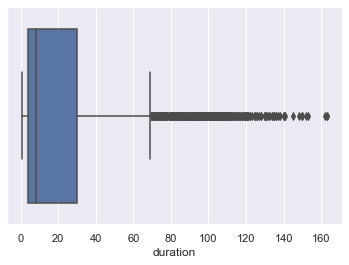

In [21]:
sns.boxplot(data =data, x= 'duration');

### As the duration data has a lot of outliers, we will fill missing values in duration with the median instead of the mean

In [23]:
data['duration'].median()

8.0

In [28]:
data['duration'].fillna(data['duration'].median(), inplace=True)

In [29]:
data.isna().sum()

title                         0
mediaType                     0
eps                           0
duration                      0
ongoing                       0
sznOfRelease                  0
years_running                 0
studio_primary                0
studios_colab                 0
contentWarn                   0
watched                       0
watching                      0
wantWatch                     0
dropped                       0
rating                        0
votes                         0
tag_Based_on_a_Manga          0
tag_Comedy                    0
tag_Action                    0
tag_Fantasy                   0
tag_Sci_Fi                    0
tag_Shounen                   0
tag_Original_Work             0
tag_Non_Human_Protagonists    0
tag_Drama                     0
tag_Adventure                 0
tag_Family_Friendly           0
tag_Short_Episodes            0
tag_School_Life               0
tag_Romance                   0
tag_Shorts                    0
tag_Slic

In [31]:
data.shape

(12101, 43)

## Exploratory Data Analysis

In [42]:
#Re usable function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12,7), kde = False, bins = None):
    '''
    data: Dataframe
    feature: dataframe column
    figsize: size of the plot, with a default of 12,7
    kde:show density curve, default false
    bins: defined number of histogram bins, default none, python decides
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2, #plots appears in 2 rows
        sharex= True, #X axis will be shared by the 2 graphs
        gridspec_kw = {'height_ratios':(0.25, 0.75)},
        figsize = figsize
    ) #creating the  2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = 'violet'
        )
    sns.histplot(
    data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, pallete = 'winter'
    ) if bins else sns.histplot(
    data = data, x =feature, kde = kde, ax = ax_hist2
    ) #For Histogram
    ax_hist2.axvline(
    data[feature].mean(), color  = 'green',linestyle = '--'
    )# Add mean to the histogram
    ax_hist2.axvline(
    data[feature].median(), color  = 'black',linestyle = '-'
    )# Add median to the histogram 

In [51]:
## Reusablefunction to create labelled bar plots

def labeled_barplot(data, feature, perc = False, n= None):
    '''
    Barplot with percentage at the top
    data: Dataframe
    feature: dataframe column
    n:displays the top n category levels (default is None, i.e show all levels)
    perc:whether to display percentage instead of count, default is false
    '''
    
    total = len(data[feature]) #lengthof columns
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize= (count+ 1, 5))
    else:
        plt.figure(figsize= (n+ 1, 5))
        
    plt.xticks(rotation = 90, fontsize = 15)
    ax= sns.countplot(
        data=data, x = feature, palette = 'Paired', order = data[feature].value_counts().index[:n].sort_values(),
    )
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100*p.get_height()/ total) #%age of each class of the category
        else:
            label = p.get_height() #count of each level of the category
        
        x = p.get_x() + p.get_width()/2 #width of the plot
        y = p.get_height() #height of the plot
        
        #annotate the percentage
        ax.annotate(label, (x,y), ha = 'center', va = 'center', size =12, xytext = (0,5), textcoords = 'offset points')
        
    plt.show()
    
        

## Rating

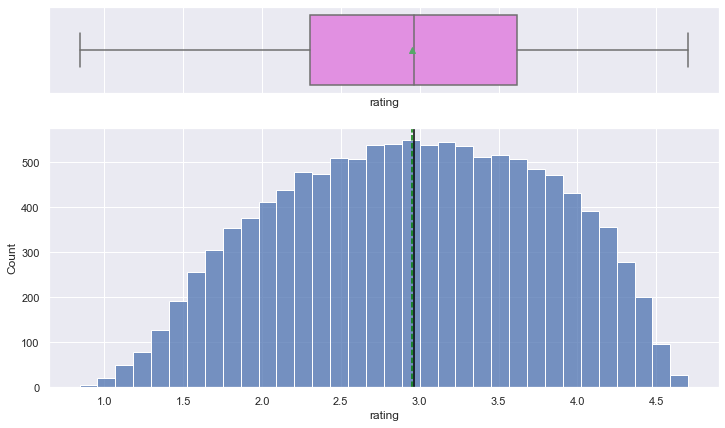

In [44]:
histogram_boxplot(data, 'rating')

## EPS

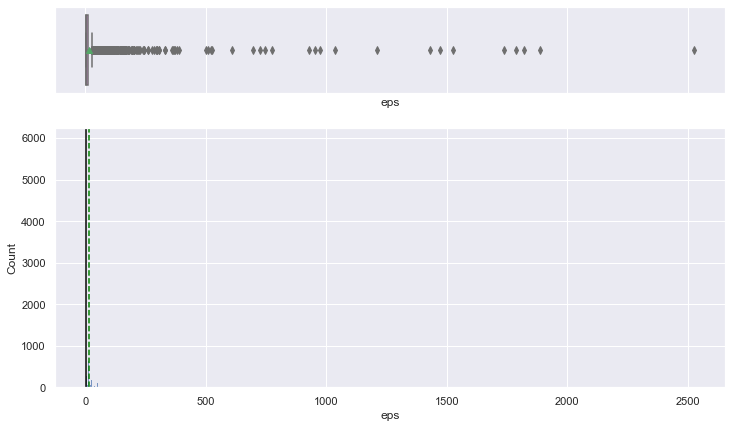

In [47]:
histogram_boxplot(data, 'eps')

## Duration

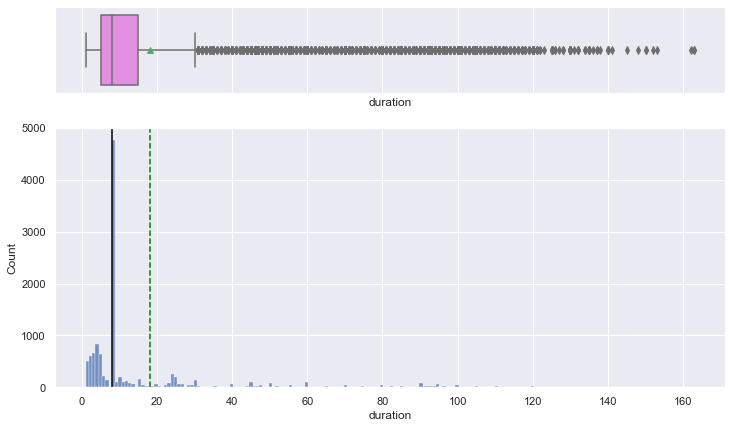

In [48]:
histogram_boxplot(data, 'duration')

## Media type

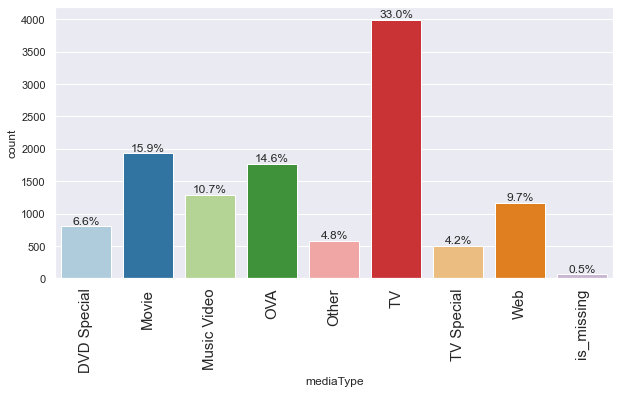

In [52]:
labeled_barplot(data, 'mediaType',perc = True)

## Studio Primary

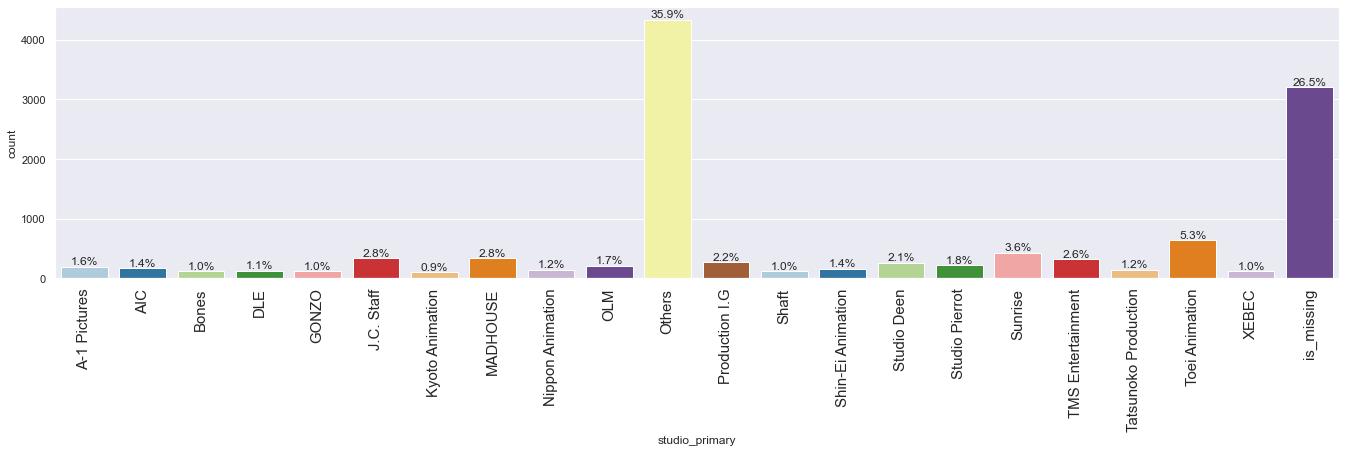

In [53]:
labeled_barplot(data, 'studio_primary',perc = True)

## Season of release vs Rating

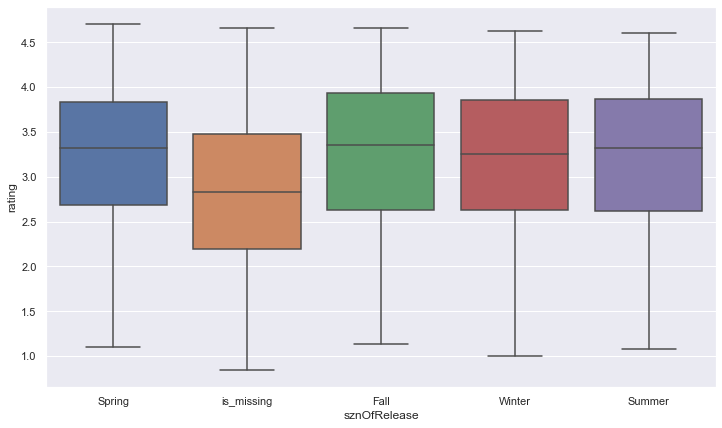

In [58]:
plt.figure(figsize = (12,7))
sns.boxplot(data = data, x = 'sznOfRelease', y = 'rating');

# Model Building

In [59]:
X= data.drop(['rating', 'title'], axis = 1) # drop title as it has too much text

In [60]:
y = data['rating']

## Creating Dummy variables for categorical variables

In [75]:
X = pd.get_dummies(X, columns = X.select_dtypes(include=['object','category']).columns.tolist(), drop_first= True)
X.head()

,eps,duration,ongoing,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,mediaType_is_missing,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
0,64,8.0,False,1,0,1,103707.0,14351,25810,2656,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,107.0,False,0,0,0,58831.0,1453,21733,124,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,130.0,False,0,0,1,45892.0,946,17148,132,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,8.0,False,0,0,0,25134.0,2183,8082,167,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,10,8.0,False,0,0,1,21308.0,3217,7864,174,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [76]:
X.shape

(12101, 71)

In [86]:
y_test.shape

(3631,)

## Split the data into train and test sets

In [77]:
x_train, x_test, y_train,y_test = train_test_split(X, y, test_size= 0.30, random_state=1)

In [78]:
print('Number of rowsin train data =', x_train.shape[0])
print('Number of rowsin test data =', x_test.shape[0])

Number of rowsin train data = 8470
Number of rowsin test data = 3631


## Fitting the Linear Model

In [79]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

## Model Perfomance
- Use of sklearn functions for RMSE, MAE and R Squared


In [81]:
#function to compute adjusted R
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1-r2)* (n-1)/ (n-k-1))

#function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions)/ targets)*100

#function to compute different metric to check perfomance of a regression model
def model_perfomance_regression(model, predictors, target):
    '''
    model: regressor
    predictors: independent variables
    target: dependent variable
    '''
    
    #predicting using the independent variable
    pred = model.predict(predictors)
    
    r2 =r2_score(target, pred) #to get R-Squared
    adjr2 = adj_r2_score(predictors, target, pred) # to get adjusted R-Squared
    rmse = np.sqrt(mean_squared_error(target, pred)) # to get RMSE
    mae = mean_absolute_error(target,pred) # to get MAE
    mape = mape_score(target, pred) #to compute MAPE
    
    #creating a datafame of metrics
    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-Squared':r2,
            "Adj. R- Squared": adjr2,
            "MAPE": mape,

        },
        index = [0],
    )
    return df_perf

In [82]:
#Check the model perfomance on the train set
print('Training Perfomance\n')
lin_reg_model_train_perf = model_perfomance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Perfomance



,RMSE,MAE,R-Squared,Adj. R- Squared,MAPE
0,0.562814,0.452854,0.535917,0.531993,17.759752


In [84]:
#Check the model perfomance on the test set
print('Test Perfomance\n')
lin_reg_model_test_perf = model_perfomance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Perfomance



,RMSE,MAE,R-Squared,Adj. R- Squared,MAPE
0,0.577459,0.467199,0.515491,0.505825,18.151709


- The R squared scores for train and test are 0.545 and 0.515 indicating explains 53.5% and 51.5% of the total variation in the train and test sets respectively
- Both scores are comparable, thus the model is not overfitting.
- The overall perfomance is not so great, meaning the model is underfitting.